# Projet Python 2023 : études des aménagements cyclables en Ile-de-France

Catherine Berleur et Christelle Nguenang Tchatchouang

## Introduction

Alors que la population française est à très grande majorité urbanisée, les problèmes d’aménagements urbains et de mobilité urbaine ont pris une place de plus en plus importante dans les débats politiques et la recherche scientifique. Avec près de 80 % de sa population habitant en ville, la France illustre les enjeux et les défis qui accompagnent les questions de mobilité urbaine : qualité de vie, durabilité environnementale, santé publique autour des enjeux de pollution, etc. Autant d’éléments qui contribuent au bien-être général de la pollution. Dans le contexte de la forte pollution et des problèmes de congestion urbaine dans les métropoles françaises, les vélos ont fait l’objet de nombreuses politiques publiques visant à développer leur usage : aide à l’achat de vélo, développement de stations en libre-service, construction de pistes cyclables, etc. En effet, la généralisation de la pratique du vélo représente une solution potentielle à un certain nombre de ces enjeux. Dans ce contexte, notre recherche explore la répartition géographique des aménagements et des stations ‘vélib’ en île de France ainsi que leurs déterminants. La région Île-de-France a mis en œuvre une politique significative de stations de vélos en libre-service, et nous cherchons à expliquer les critères de développer des aménagements cyclables dans l'optique d'évaluer sa pertinence par rapport aux besoins de la population.

### Focus sur l'Ile de France

Le système de vélos en libre-service Vélib' est devenu une partie intégrante de la mobilité urbaine parisienneet dans toute la France en général, offrant aux citoyens et aux visiteurs un mode de transport alternatif et respectueux de l'environnement. En examinant les emplacements et les caractéristiques des stations Vélib' en île de France, nous cherchons à comprendre la distribution spatiale de ces installations et les facteurs qui influencent leur emplacement dans les différentes communes de la région. Cependant, les installations vélib ne couvrent que la 'petite couronne' parisienne, et ne se trouvent donc pas dans l'entiereté des départements, et a fortiori des communes, d'Ile de France. Nous étendons notre analyse à un champ plus large, en considérant la densité des pistes cyclables à travers la région Il de France. Comprendre les variations de la densité des pistes cyclables nous permet d'évaluer l'infrastructure cyclable au niveau régional, offrant ainsi une perspective globale sur l'état des équipements de mobilité urbaine. Pour compléter ces ensembles de données spatiales, nous incorporons des indicateurs sociodémographiques, afin d'identifier les déterminants qui influencent le développement et l'utilisation des infrastructures cyclables.

## Les importations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pynsee as yns
import requests
from pathlib import Path
from cartiflette.s3 import download_vectorfile_url_all

/home/cathu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
## A faire tourner en cas de packages manquants :

## Attention, pour valider votre input, il faut appuyer sur la touche "Entrée" et non sur "Exécuter"

# %run "./0_dep.ipynb"

Ce notebook permet de faire tourner à le suite l'ensemble des notebooks, pour ne pas avoir à reconstruire les bases à chaque fois notamment (1_base.ipynb). Cependant, pour la clarté des résultats et de notre démarche, il est conseillé de faire tourner en propre les notebooks 2_desc et 3_model.

## Création de la base de travail

In [6]:
%run "./1_base.ipynb"

         osm_id            nom_com sens_voit                              ag  \
0  4.014620e+08            Chelles    DOUBLE                            None   
1  4.048666e+08   La Queue-en-Brie        NC  chemin service site propre uni   
2  1.154304e+09            Lésigny        NC                  voie verte uni   
3  3.300503e+08  Pontault-Combault    UNIQUE                       DSC bande   
4  1.104033e+09   Champs-sur-Marne    UNIQUE                            None   

  panneaux moyenn_ech revetement      highway insee_com  \
0     None         32       None      service     77108   
1     None         11       None        track     94060   
2     None         11    asphalt         path     77249   
3     None         22       None  residential     77373   
4     None         22    asphalt  residential     77083   

                     nom_voie  longueur petite_ech           nv  \
0  Rue de la Mare Longue Noue        24          3    limite 30   
1             Allée Jacquette 

Downloading: : 40.1kiB [00:00, 7.74MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 4.74MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 3.42MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 2.56MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 1.57MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 1.78MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 2.78MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 2.51MiB/s]


(1471, 4)
(1472, 8)
      capacity                               name stationcode  \
0           21                 Toudouze - Clauzel        9020   
2           14  Abbeville - Faubourg Poissonnière        9002   
33          17                   Choron - Martyrs        9016   
39          22        Godot de Mauroy - Madeleine        9034   
78          24        Victoire - Chaussée d'Antin        9116   
...        ...                                ...         ...   
988         22                            Chateau       23403   
1309        30            André Theuriet - Blagis       23042   
1317        25           Général Leclerc - Bièvre       23041   
1296        27                 Place Aimé Césaire       21402   
1375        33                  Mairie de Clamart       21401   

                      geometry  index_right                        id  \
0     POINT (2.33736 48.87930)            5  ARR_MUNI0000000009736043   
2     POINT (2.34915 48.87922)            5  ARR_MUNI

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Premières analyses descriptives

Index(['osm_id', 'nom_com', 'sens_voit', 'ag', 'panneaux', 'moyenn_ech',
       'revetement', 'highway', 'insee_com', 'nom_voie', 'longueur',
       'petite_ech', 'nv', 'ad', 'geometry'],
      dtype='object')
Index(['INSEE_COM', 'cap_com', 'stat_com', 'NOM', 'NOM_M', 'STATUT',
       'POPULATION', 'INSEE_DEP', 'INSEE_REG', 'surface', 'geometry'],
      dtype='object')
Index(['nom_com', 'insee_com', 'longueur', 'longueur_pond_hw',
       'longueur_pond_adg', 'difference_hw', 'difference_adg', 'cap_com',
       'stat_com', 'source', 'surface', 'population', 'geometry'],
      dtype='object')
Index(['CODGEO', 'SUPERF', 'P20_RP', 'MED20', 'TP6020', 'P20_EMPLT', 'ETOQ21',
       'nom_com', 'insee_com', 'longueur', 'longueur_pond_hw',
       'longueur_pond_adg', 'difference_hw', 'difference_adg', 'cap_com',
       'stat_com', 'source', 'surface', 'population', 'geometry', 'dep', 'com',
       'mort_com', 'hosp_com', 'indemne_com', 'leger_com', 'acc_com'],
      dtype='object')
https://minio

Downloading: : 40.1kiB [00:00, 5.67MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 5.30MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 3.57MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 2.54MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 1.69MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 1.85MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 1.18MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 2.68MiB/s]


Index(['id', 'ID', 'NOM', 'NOM_M', 'INSEE_COM', 'STATUT', 'POPULATION',
       'INSEE_CAN', 'INSEE_ARR', 'INSEE_DEP', 'INSEE_REG', 'SIREN_EPCI',
       'source', 'insee_com', 'geometry', 'surface'],
      dtype='object')


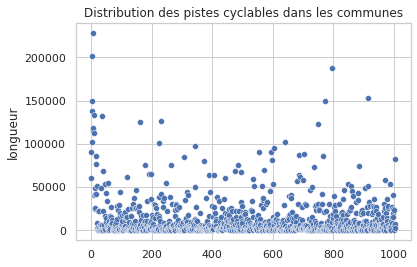

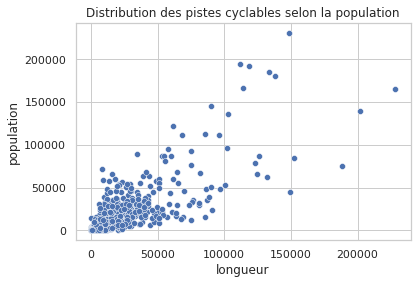

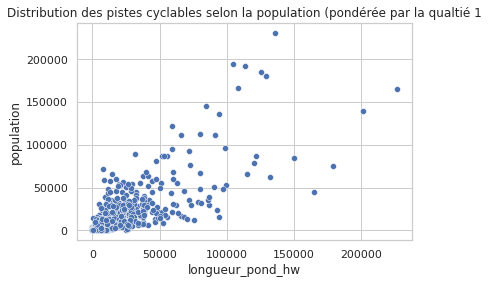

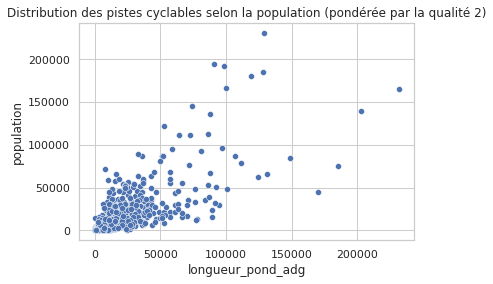

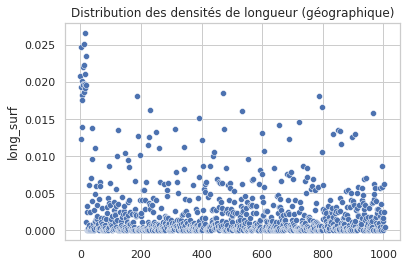

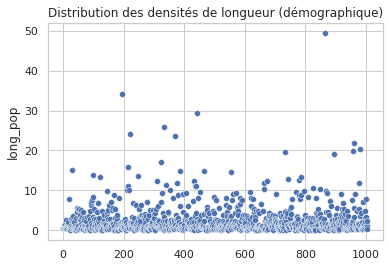

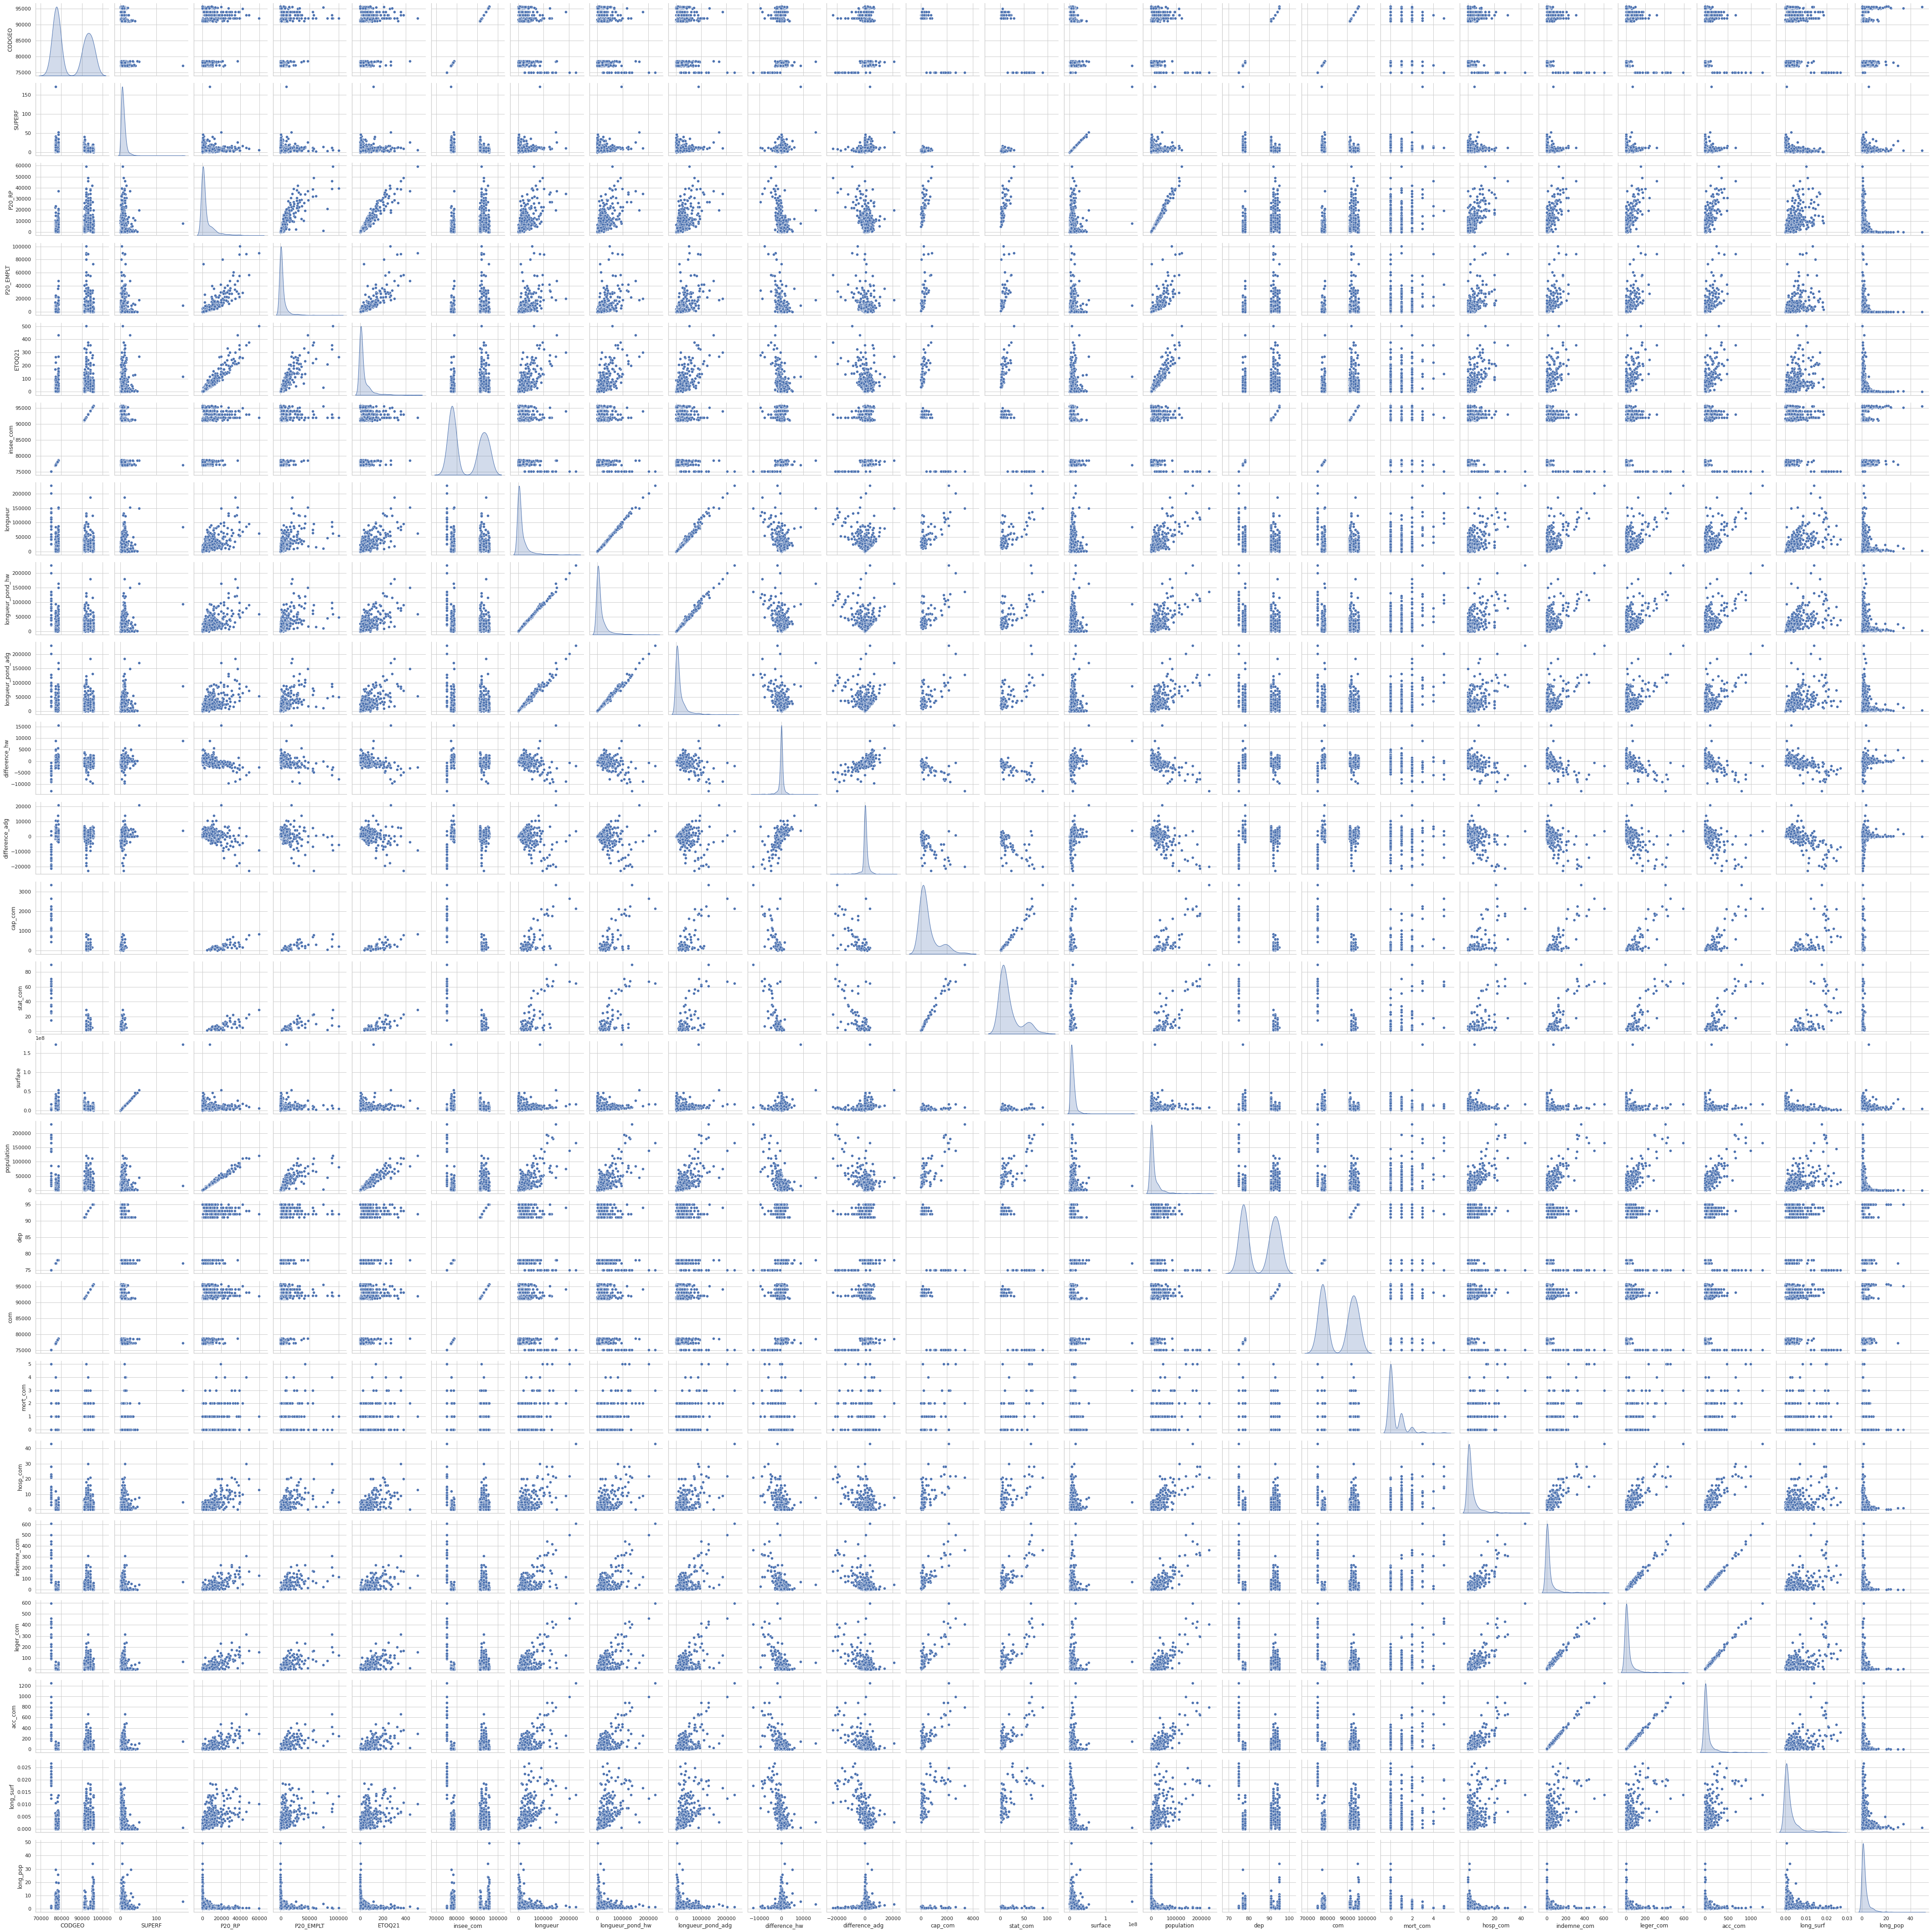

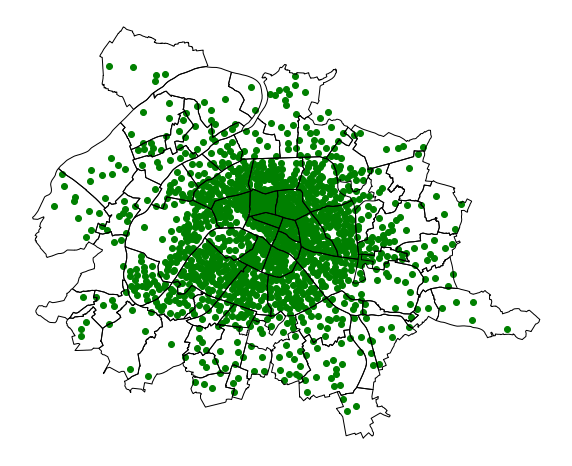

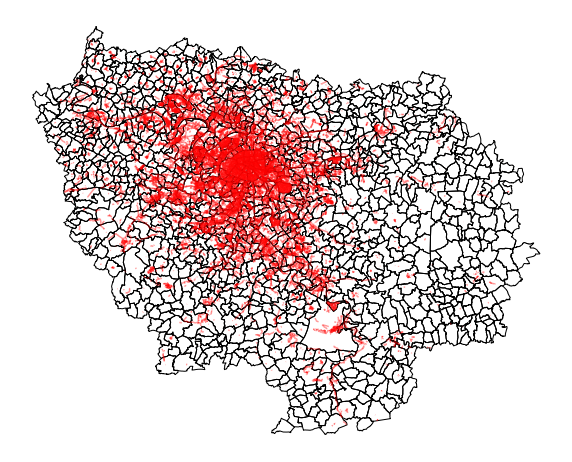

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


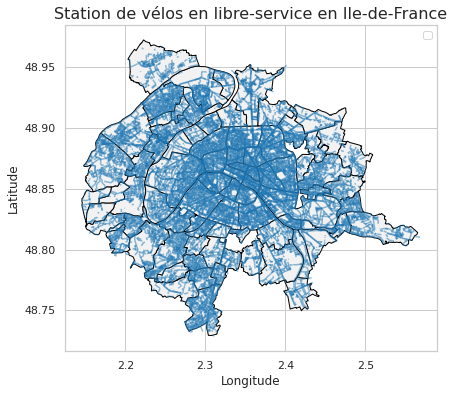

/home/cathu/.local/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


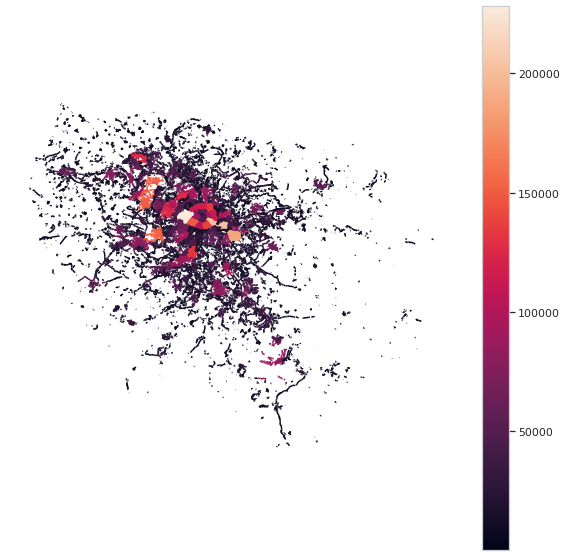

In [7]:
%run "./2_desc.ipynb"

## Modélisation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   longueur           1005 non-null   int64  
 1   longueur_pond_hw   1005 non-null   float64
 2   longueur_pond_adg  1005 non-null   float64
 3   SUPERF             985 non-null    float64
 4   P20_RP             985 non-null    float64
 5   MED20              985 non-null    object 
 6   P20_EMPLT          985 non-null    float64
 7   ETOQ21             985 non-null    float64
 8   surface            1005 non-null   float64
 9   population         1005 non-null   int64  
 10  acc_com            662 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 86.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0 

/tmp/ipykernel_125583/3105187580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['MED20'] = pd.to_numeric(base['MED20'], errors='coerce').astype(float)
/tmp/ipykernel_125583/84762160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.fillna(0, inplace=True)
/tmp/ipykernel_125583/996073743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

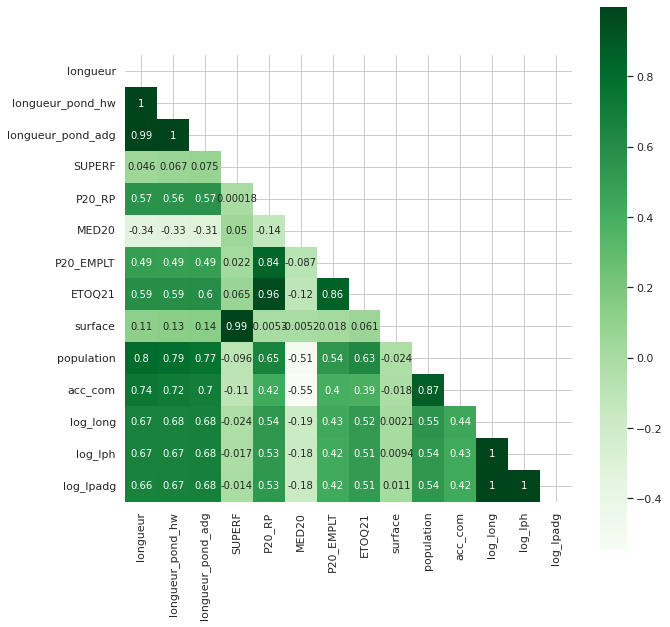

                            OLS Regression Results                            
Dep. Variable:               longueur   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     383.1
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          6.57e-255
Time:                        00:02:56   Log-Likelihood:                -10967.
No. Observations:                1005   AIC:                         2.195e+04
Df Residuals:                     998   BIC:                         2.198e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9229.9478   2430.118     -3.798      0.0

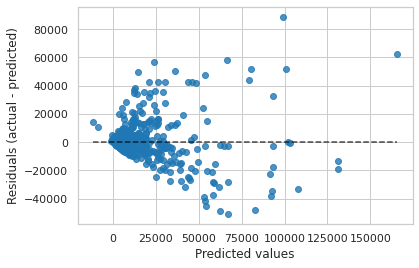

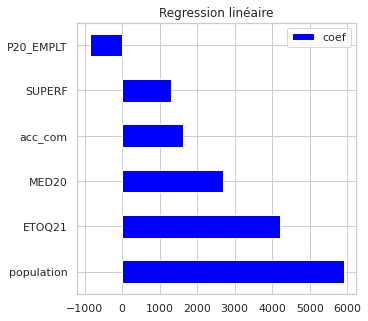

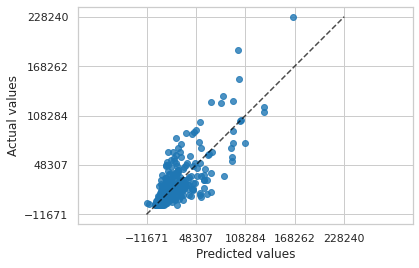

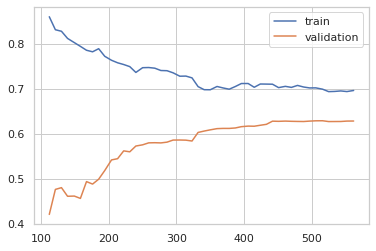

Model score - training data: -17.063230169195503
Model score - test data: -928.3429305710802


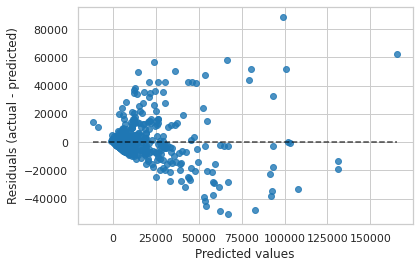

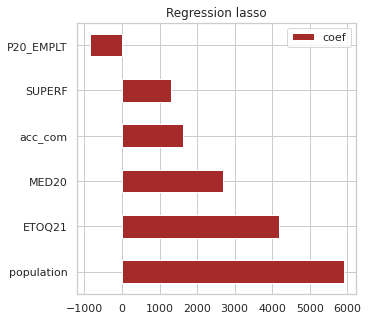

/home/cathu/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+08, tolerance: 4.547e+07
  model = cd_fast.enet_coordinate_descent(


Best params: {'regressor__alpha': 1, 'regressor__fit_intercept': True, 'regressor__max_iter': 100}


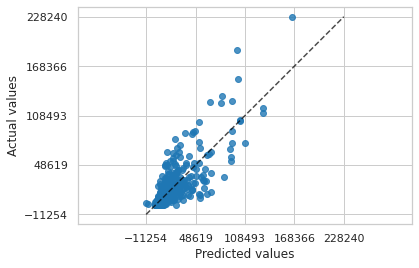

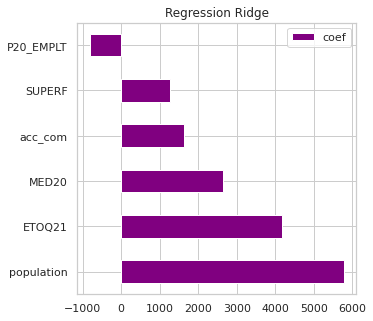

Best params: {'regressor__alphas': 1, 'regressor__fit_intercept': True}
                            OLS Regression Results                            
Dep. Variable:       longueur_pond_hw   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     350.3
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.42e-241
Time:                        00:03:05   Log-Likelihood:                -10977.
No. Observations:                1005   AIC:                         2.197e+04
Df Residuals:                     998   BIC:                         2.200e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [9]:
%run "./3_model.ipynb"

## Conclusion, limites et perspectives

Nous regrettons de n'avoir pu comparer le réseau géographique d'aménagements cyclables et sa densité à celui des bus en Ile-de-France, faute d'avoir trouvé une base de données publiques avec les variables adéquates. Nous pensons en effet que la comparaison des répartitions de l'ensemble des transports "écolos" aurait été pertinente, et pourrait constituer une piste de poursuite du projet intéressante.

D'autre part, les variables que nous avons tenté de créer pour prendre en compte la qualité des pistes ne sont pas révélées très utiles, ce qui pourrait s'expliquer par plusieurs raisons : 1) les variables auxquelles nous avons eu accès ne sont pas assez précises et complètes, 2) la qualité des pistes cyclables est croissante de sa quantité, ce qui ne modifie pas le 'classement' des communes, 3) notre approche de la qualité n'était pas pertinente.